# Repaso Solemne I

Para este repaso, se considera una base dividida en 2.
Esta base consiste en el rendimiento promedio de estudiantes. Las variables son :

- rdm: Rendimiento.
- Genero: Genero, pudiendo tomar los valores de Hombre y Mujer.
- pgen: Promedio General.
- ingf: Ingreso Familiar.
- nfam: El número de integrantes en la familia.
- tocio: Las horas de ocio.


## Carga de datos

In [1]:
import pandas as pd
%matplotlib inline
df1 = pd.read_csv("datasets/Base1.csv") 
df2 = pd.read_csv('datasets/Base2.csv')

In [2]:
df1

,ID,rdm,Genero,pgen
0,1,124,Hombre,7.0
1,2,267,Mujer,12.0
2,3,193,Mujer,9.0
3,4,122,Hombre,4.0
4,5,134,Hombre,7.0
...,...,...,...,...
195,196,215,Hombre,11.0
196,197,138,Mujer,11.0
197,198,189,Hombre,7.0
198,199,109,Mujer,6.0


In [3]:
df2

,ID,ingf,nfam,tocio
0,1,434.0,10.0,8.0
1,2,1002.0,10.0,1.0
2,3,657.0,11.0,12.0
3,4,200.0,3.0,2.0
4,5,408.0,8.0,12.0
...,...,...,...,...
195,196,610.0,10.0,9.0
196,197,522.0,3.0,12.0
197,198,558.0,4.0,2.0
198,199,424.0,6.0,11.0


### Fusionar las 2 bases de datos.

In [4]:
#Unir las 2 bases de datos en 1, Usando merge
df = pd.merge(df1, df2, how='inner', on= 'ID' )
df

,ID,rdm,Genero,pgen,ingf,nfam,tocio
0,1,124,Hombre,7.0,434.0,10.0,8.0
1,2,267,Mujer,12.0,1002.0,10.0,1.0
2,3,193,Mujer,9.0,657.0,11.0,12.0
3,4,122,Hombre,4.0,200.0,3.0,2.0
4,5,134,Hombre,7.0,408.0,8.0,12.0
...,...,...,...,...,...,...,...
195,196,215,Hombre,11.0,610.0,10.0,9.0
196,197,138,Mujer,11.0,522.0,3.0,12.0
197,198,189,Hombre,7.0,558.0,4.0,2.0
198,199,109,Mujer,6.0,424.0,6.0,11.0


#### Documentacion de merge

Documentacion:
[merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html)


## Analisis de datos

In [5]:
list(df)

['ID', 'rdm', 'Genero', 'pgen', 'ingf', 'nfam', 'tocio']

In [6]:
df.describe()
# Falta la variable Genero para interpretar, pero es string.

,ID,rdm,pgen,ingf,nfam,tocio
count,200.000000,200.000000,199.000000,198.000000,198.000000,199.000000
mean,100.500000,182.930000,9.336683,577.348485,6.828283,6.653266
std,57.879185,88.174935,8.952298,269.150355,7.688795,8.914033
min,1.000000,11.000000,3.000000,139.000000,3.000000,0.000000
25%,50.750000,119.500000,6.000000,372.000000,3.000000,3.000000
50%,100.500000,177.500000,8.000000,523.500000,6.000000,6.000000
75%,150.250000,232.250000,11.000000,715.750000,8.000000,9.000000
max,200.000000,411.000000,124.000000,1297.000000,92.000000,120.000000


### Trabajar la variable Dicotomica

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df.Genero = le.fit_transform(df.Genero)
model_mapping = {index : label for index, label in enumerate(le.classes_)}
model_mapping

{0: 'Hombre', 1: 'Mujer'}

In [8]:
df.describe()

,ID,rdm,Genero,pgen,ingf,nfam,tocio
count,200.000000,200.000000,200.000000,199.000000,198.000000,198.000000,199.000000
mean,100.500000,182.930000,0.445000,9.336683,577.348485,6.828283,6.653266
std,57.879185,88.174935,0.498213,8.952298,269.150355,7.688795,8.914033
min,1.000000,11.000000,0.000000,3.000000,139.000000,3.000000,0.000000
25%,50.750000,119.500000,0.000000,6.000000,372.000000,3.000000,3.000000
50%,100.500000,177.500000,0.000000,8.000000,523.500000,6.000000,6.000000
75%,150.250000,232.250000,1.000000,11.000000,715.750000,8.000000,9.000000
max,200.000000,411.000000,1.000000,124.000000,1297.000000,92.000000,120.000000


### Quitar Missing Values

In [9]:
# Por simplicidad se eliminarán los valores nulos
df = df.dropna()
df.describe()

,ID,rdm,Genero,pgen,ingf,nfam,tocio
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,103.092784,182.979381,0.443299,9.309278,578.025773,6.855670,6.716495
std,56.804014,88.556996,0.498060,9.053509,270.314717,7.751302,8.995510
min,1.000000,11.000000,0.000000,3.000000,139.000000,3.000000,0.000000
25%,55.250000,118.500000,0.000000,6.000000,372.000000,3.000000,3.000000
50%,103.500000,178.000000,0.000000,8.000000,523.500000,6.000000,6.000000
75%,151.750000,236.750000,1.000000,11.000000,715.750000,8.000000,9.000000
max,200.000000,411.000000,1.000000,124.000000,1297.000000,92.000000,120.000000


### Valores Atipicos (Buscandolos a través de estadisitca descriptiva e histogramas).

<AxesSubplot:ylabel='Frequency'>

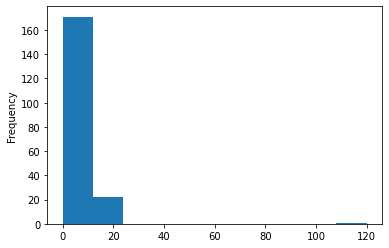

In [10]:
# T.ocio 120
df['tocio'].plot.hist()

In [11]:
df = df[df['tocio']<120]
df.describe()

,ID,rdm,Genero,pgen,ingf,nfam,tocio
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,103.393782,182.911917,0.445596,9.305699,578.383420,6.875648,6.129534
std,56.796423,88.782315,0.498324,9.076918,270.971724,7.766453,3.762314
min,1.000000,11.000000,0.000000,3.000000,139.000000,3.000000,0.000000
25%,56.000000,118.000000,0.000000,6.000000,371.000000,3.000000,3.000000
50%,104.000000,178.000000,0.000000,8.000000,525.000000,6.000000,6.000000
75%,152.000000,239.000000,1.000000,11.000000,717.000000,8.000000,9.000000
max,200.000000,411.000000,1.000000,124.000000,1297.000000,92.000000,12.000000


<AxesSubplot:ylabel='Frequency'>

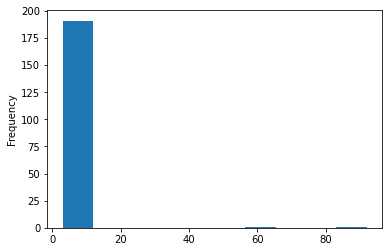

In [12]:
#nfam 92
df['nfam'].plot.hist()

In [13]:
df = df[df['nfam']<92]
df.describe()

,ID,rdm,Genero,pgen,ingf,nfam,tocio
count,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000,192.000000
mean,103.203125,183.557292,0.442708,9.317708,579.359375,6.432292,6.109375
std,56.882955,88.559365,0.498005,9.099111,271.339842,4.743207,3.761686
min,1.000000,11.000000,0.000000,3.000000,139.000000,3.000000,0.000000
25%,55.750000,119.500000,0.000000,6.000000,371.000000,3.000000,3.000000
50%,103.500000,178.000000,0.000000,8.000000,525.500000,6.000000,6.000000
75%,152.250000,239.750000,1.000000,11.000000,718.250000,8.000000,9.000000
max,200.000000,411.000000,1.000000,124.000000,1297.000000,60.000000,12.000000


In [14]:
df = df[df['nfam']<60]
df.describe()

,ID,rdm,Genero,pgen,ingf,nfam,tocio
count,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000,191.000000
mean,102.696335,183.397906,0.445026,9.345550,580.329843,6.151832,6.104712
std,56.596187,88.764495,0.498275,9.114821,271.718665,2.726668,3.771015
min,1.000000,11.000000,0.000000,3.000000,139.000000,3.000000,0.000000
25%,55.500000,119.000000,0.000000,6.000000,371.000000,3.000000,3.000000
50%,103.000000,178.000000,0.000000,8.000000,526.000000,6.000000,6.000000
75%,151.500000,240.500000,1.000000,11.000000,719.500000,8.000000,9.000000
max,199.000000,411.000000,1.000000,124.000000,1297.000000,11.000000,12.000000


In [15]:
df = df[df['pgen']<124]
df.describe()

,ID,rdm,Genero,pgen,ingf,nfam,tocio
count,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000
mean,102.689474,182.952632,0.447368,8.742105,579.584211,6.168421,6.115789
std,56.745635,88.784877,0.498536,3.687791,272.240558,2.724192,3.777861
min,1.000000,11.000000,0.000000,3.000000,139.000000,3.000000,0.000000
25%,55.250000,118.500000,0.000000,6.000000,371.000000,3.000000,3.000000
50%,102.500000,177.500000,0.000000,8.000000,525.500000,6.000000,6.000000
75%,151.750000,236.750000,1.000000,11.000000,715.750000,8.000000,9.000000
max,199.000000,411.000000,1.000000,19.000000,1297.000000,11.000000,12.000000


Ahora que se tiene la base limpia, es posible interpretar.
Entre las interpretaciones, se puede suponer la inexistencia de valores atipicos (outliers) dado que la media y la mediana están cercanas. (Vale la pena mencionar que la media es sensible a estos outliers).
- En promedio los ingresos familiariaoes están en los $ 580.
- En promedio el tiempo de ocio de los estudiantes es de 6 horas.


## Parte II , calculo manual de betas

$(X^{T}X)^{-1}X^{T}Y$


In [16]:
#Crear y agregar el intercepto
df['Intercepto'] = 1

In [17]:
import numpy as np
df

,ID,rdm,Genero,pgen,ingf,nfam,tocio,Intercepto
0,1,124,0,7.0,434.0,10.0,8.0,1
1,2,267,1,12.0,1002.0,10.0,1.0,1
2,3,193,1,9.0,657.0,11.0,12.0,1
3,4,122,0,4.0,200.0,3.0,2.0,1
4,5,134,0,7.0,408.0,8.0,12.0,1
...,...,...,...,...,...,...,...,...
194,195,372,1,16.0,995.0,5.0,7.0,1
195,196,215,0,11.0,610.0,10.0,9.0,1
196,197,138,1,11.0,522.0,3.0,12.0,1
197,198,189,0,7.0,558.0,4.0,2.0,1


In [18]:
#Ver las variables en juego
list(df)

['ID', 'rdm', 'Genero', 'pgen', 'ingf', 'nfam', 'tocio', 'Intercepto']

In [19]:
#Establecer el Y, y X

In [20]:
Y = df["rdm"]
X = df[['Intercepto',"Genero","pgen", "ingf","nfam","tocio"]]

In [21]:
print(Y)

0      124
1      267
2      193
3      122
4      134
      ... 
194    372
195    215
196    138
197    189
198    109
Name: rdm, Length: 190, dtype: int64


In [22]:
print(X)

     Intercepto  Genero  pgen    ingf  nfam  tocio
0             1       0   7.0   434.0  10.0    8.0
1             1       1  12.0  1002.0  10.0    1.0
2             1       1   9.0   657.0  11.0   12.0
3             1       0   4.0   200.0   3.0    2.0
4             1       0   7.0   408.0   8.0   12.0
..          ...     ...   ...     ...   ...    ...
194           1       1  16.0   995.0   5.0    7.0
195           1       0  11.0   610.0  10.0    9.0
196           1       1  11.0   522.0   3.0   12.0
197           1       0   7.0   558.0   4.0    2.0
198           1       1   6.0   424.0   6.0   11.0

[190 rows x 6 columns]


In [23]:
list(X)

['Intercepto', 'Genero', 'pgen', 'ingf', 'nfam', 'tocio']

## Pasar a matriz y calcular los B


In [24]:
Y = np.asarray(Y)
X = np.asarray(X)

In [25]:
print(X)

[[1.000e+00 0.000e+00 7.000e+00 4.340e+02 1.000e+01 8.000e+00]
 [1.000e+00 1.000e+00 1.200e+01 1.002e+03 1.000e+01 1.000e+00]
 [1.000e+00 1.000e+00 9.000e+00 6.570e+02 1.100e+01 1.200e+01]
 ...
 [1.000e+00 1.000e+00 1.100e+01 5.220e+02 3.000e+00 1.200e+01]
 [1.000e+00 0.000e+00 7.000e+00 5.580e+02 4.000e+00 2.000e+00]
 [1.000e+00 1.000e+00 6.000e+00 4.240e+02 6.000e+00 1.100e+01]]


In [26]:
print(Y)

[124 267 193 122 134 100 296 194 331 225 226 211 120 344 212 210 168 156
 199  56 253 254 332 136 184 134 284 174 137 277 118  33  82 264  54 305
 140 346 118 215 239 128  19  35 411 180 107 194 245 211 131 218 164 360
 138  81  84 194 178 130 335 338 161 213 167 373  73 180 228 248 140 188
 291 175  25 214 151 258 115 224 264 246  57 166 169 262 114 123 130  61
  75 251 178 397 129 121  42 138 217 149 176  92 207 147 306 242 125  73
 196 100 135  52 186 141 279  74 101 222 106 268 230 139  88 102 265 117
 124 171 230  69 194 148 255  18  11 172 118 163 162 202 211 183 106 177
 295 157 207 207  92 228 225 100  90 394 193 193  27 343 226  77  57 385
 374 352 282 312 126 283 278  69 242 229 182 157 111 331 200 127  91  95
 309  42 285 221 100 372 215 138 189 109]


$ X^{T}$


In [27]:
XT = np.transpose(X)
print(XT)

[[1.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 1.000e+00 1.000e+00]
 [0.000e+00 1.000e+00 1.000e+00 ... 1.000e+00 0.000e+00 1.000e+00]
 [7.000e+00 1.200e+01 9.000e+00 ... 1.100e+01 7.000e+00 6.000e+00]
 [4.340e+02 1.002e+03 6.570e+02 ... 5.220e+02 5.580e+02 4.240e+02]
 [1.000e+01 1.000e+01 1.100e+01 ... 3.000e+00 4.000e+00 6.000e+00]
 [8.000e+00 1.000e+00 1.200e+01 ... 1.200e+01 2.000e+00 1.100e+01]]


$ (X^{T}X)$

In [28]:
P = np.dot(XT,X)
print(P)

[[1.9000000e+02 8.5000000e+01 1.6610000e+03 1.1012100e+05 1.1720000e+03
  1.1620000e+03]
 [8.5000000e+01 8.5000000e+01 7.2100000e+02 4.6769000e+04 4.8800000e+02
  5.8300000e+02]
 [1.6610000e+03 7.2100000e+02 1.7091000e+04 1.1354600e+06 1.0297000e+04
  9.7890000e+03]
 [1.1012100e+05 4.6769000e+04 1.1354600e+06 7.7832113e+07 6.8221600e+05
  6.4895500e+05]
 [1.1720000e+03 4.8800000e+02 1.0297000e+04 6.8221600e+05 8.6320000e+03
  7.2210000e+03]
 [1.1620000e+03 5.8300000e+02 9.7890000e+03 6.4895500e+05 7.2210000e+03
  9.8040000e+03]]


$(X^{T}X)^{-1}$

In [29]:
I = np.linalg.inv(P)
print(I)

[[ 8.56495286e-02 -1.15327224e-02 -3.61489630e-03 -2.14845025e-06
  -4.46773272e-03 -2.42342001e-03]
 [-1.15327224e-02  2.27337424e-02 -5.51704121e-04  9.79800790e-06
   6.08379090e-04 -5.30771974e-04]
 [-3.61489630e-03 -5.51704121e-04  2.29889269e-03 -2.83196275e-05
  -4.15604316e-05  7.10489801e-05]
 [-2.14845025e-06  9.79800790e-06 -2.83196275e-05  4.21850650e-07
   4.13920634e-07 -2.80081122e-07]
 [-4.46773272e-03  6.08379090e-04 -4.15604316e-05  4.13920634e-07
   7.30521147e-04 -3.06052214e-05]
 [-2.42342001e-03 -5.30771974e-04  7.10489801e-05 -2.80081122e-07
  -3.06052214e-05  3.90933904e-04]]


$(X^{T}X)^{-1}X^{T}$

In [30]:
PT=np.dot(I,XT)

$(X^{T}X)^{-1}X^{T}Y$

In [31]:
B=np.dot(PT,Y)

In [32]:
print(B)

[55.85316245 -1.36609411  3.874624    0.21081756 -1.31603637 -3.30789967]


## Parte III, calculo mediante libreria

In [33]:
list(df)

['ID', 'rdm', 'Genero', 'pgen', 'ingf', 'nfam', 'tocio', 'Intercepto']

In [34]:
# Se construirá un modelo y se estimará.
import statsmodels.api as sm
Y = df["rdm"]
X = df[["Genero","pgen", "ingf","nfam","tocio"]]
Modelo = sm.OLS(Y, sm.add_constant(X))
Resultados = Modelo.fit()
print(Resultados.summary())

                            OLS Regression Results                            
Dep. Variable:                    rdm   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     79.77
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           3.30e-44
Time:                        17:29:42   Log-Likelihood:                -1011.9
No. Observations:                 190   AIC:                             2036.
Df Residuals:                     184   BIC:                             2055.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         55.8532     14.796      3.775      0.0

## Parte IV, interpretacion

$ \begin{aligned}\ \ \\
H_{0}:\beta rdm=\beta pgen=\beta ingf=\beta nfam=\beta tocio=\beta gm=\beta gh =\beta_{i}=0\\
H_{1}:\beta _{1}\neq 0\end{aligned}  $

Hipotesis nula, los B son iguales a 0 (prueba de significacia global)

porque evalua de forma conjunta que los parametros de la variable sean igual a 0 

La hipotesis alternativa dice que almenos algun beta será distinto de 0

![pfisher](pfisher.jpg)


![pvalue](pvalue.jpg)